In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
os.chdir("..")

from transformer.data import COCODataset

In [4]:
from torchvision import transforms

# ImageNet mean and std
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

image_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize((232, 232)),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
## Get the Dataset
train_dataset = COCODataset(
    root='/datasets/coco/train2014/',
    annotation_path='/datasets/coco/annotations/captions_train2014.json',
    train=True,
    image_transform=transform,
    remove_idx=True,
    vocab_min_freq=5,
    return_all_captions=True,
)

In [6]:
print("Train Dataset Size: ", len(train_dataset))
print("Vocab Size:", len(train_dataset.vocab))

Train Dataset Size:  406715
Vocab Size: 8853


In [8]:
train_dataset.df.head()

license                        file_name  \
0        2  COCO_train2014_000000253483.jpg   
1        3  COCO_train2014_000000402905.jpg   
2        2  COCO_train2014_000000289460.jpg   
3        2  COCO_train2014_000000370391.jpg   
4        2  COCO_train2014_000000377543.jpg   

                                            coco_url  height  width  \
0  http://images.cocodataset.org/train2014/COCO_t...     427    640   
1  http://images.cocodataset.org/train2014/COCO_t...     351    640   
2  http://images.cocodataset.org/train2014/COCO_t...     640    427   
3  http://images.cocodataset.org/train2014/COCO_t...     640    640   
4  http://images.cocodataset.org/train2014/COCO_t...     574    640   

         date_captured                                         flickr_url  \
0  2013-11-21 19:28:30  http://farm3.staticflickr.com/2081/2242217041_...   
1  2013-11-17 04:45:38  http://farm5.staticflickr.com/4053/4697147623_...   
2  2013-11-16 22:54:42  http://farm3.staticflickr.com/2600/3667710447_...   
3  2013-11-21 01:07:28  http://farm9.staticflickr.com/8412/10212299825...   
4  2013-11-21 01:51:53  http://farm3.staticflickr.com/2441/3928393682_...   

     id_x  image_id    id_y  \
0  253483    253483  349951   
1  402905    402905  252903   
2  289460    289460  271172   
3  370391    370391   32196   
4  377543    377543  124607   

                                             caption  \
0  A shelf in bathroom with two electric toothbru...   
1  assorted poles covered with assorted colorful ...   
2  A little girl's bike is left near a yellow fir...   
3          A collection of photos of plates of food.   
4  an asians woman returing a tennis ball to her ...   

                                        caption_list  
0  [a, shelf, in, bathroom, with, two, electric, ...  
1  [assorted, poles, covered, with, assorted, col...  
2  [a, little, girl, 's, bike, is, left, near, a,...  
3  [a, collection, of, photos, of, plates, of, fo...  
4  [an, asians, woman, returing, a, tennis, ball,...

In [16]:
def show_example(data=train_dataset):
    idx = np.random.randint(0, len(data.df))
    image_id = data.df['image_id'][idx]
    all_captions = data.df[data.df['image_id'] == image_id]['caption'].tolist()
    image_path = '/datasets/coco/train2014/' + data.df['file_name'][idx]
    img = Image.open(image_path)
    
    # print all captions
    print("captions:", all_captions)
    
    # show the image
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(img)

captions: ['A bathroom which has a sink, window and mirror. ', 'A dingy yellow tiled bathroom is shown in dim light.', 'A white sink and window in a room.', 'A small bathroom with yellow tile accented with white.', 'A white sink in a bathroom next to an open window.']


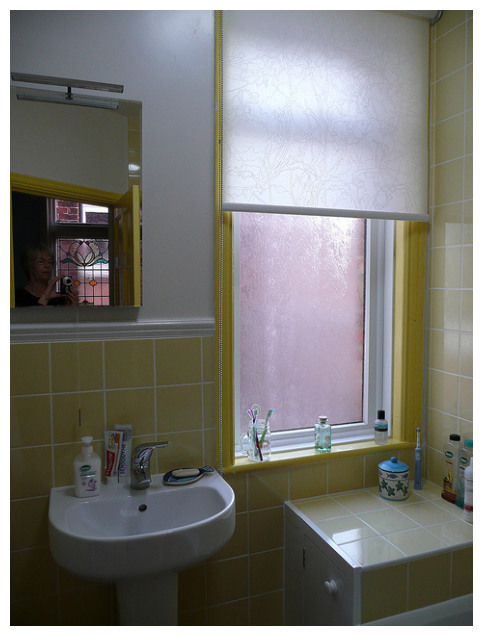

In [19]:
show_example()

captions: ['A backyard patio with outdoor furniture and an umbrella.', 'A backyard with patio furniture and an umbrella.', 'A backyard with patio furniture and sun shade.', 'A patio with an umbrella and couches on concrete.', 'And outside patio area with a couch and umbrella.']


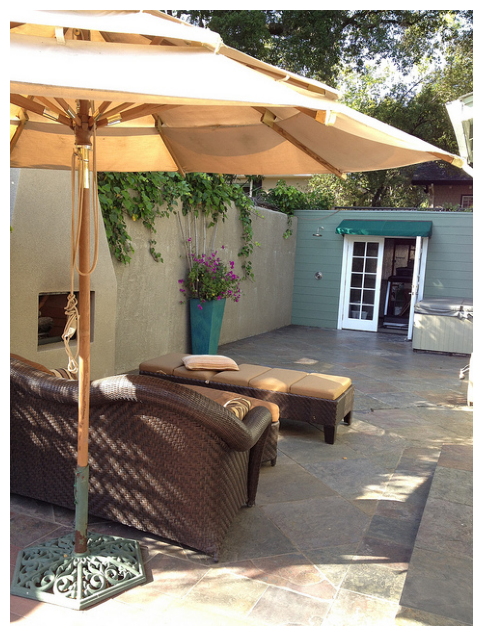

In [20]:
show_example()

captions: ['A surfer holding up a surf board overlooking the ocean.', 'A man holding a surfboard looks out on to the water.', 'A blue and white woman holding a surfboard on top of a beach.', 'An oceanview with two statue figures standing in the sand.', 'A surfboard statue with someone behind it. ']


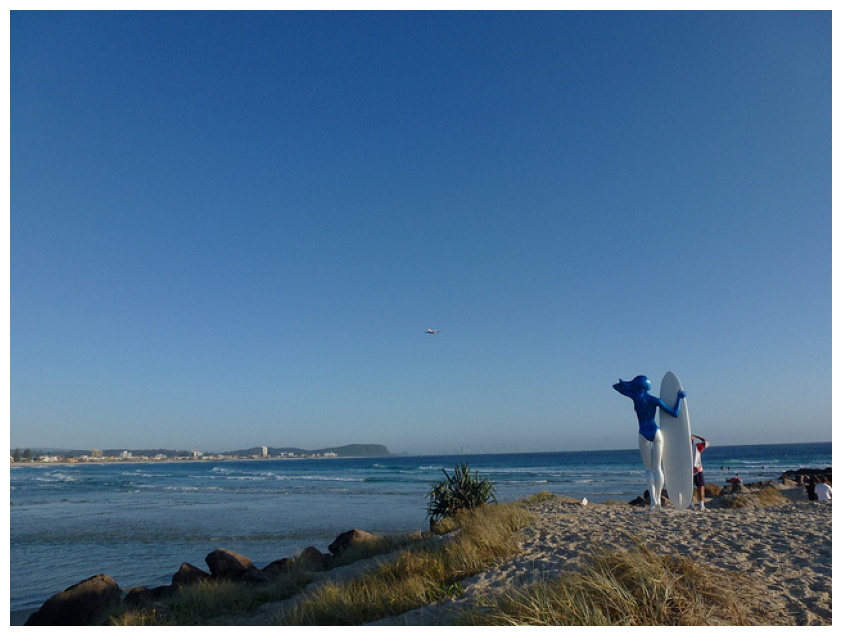

In [21]:
show_example()

captions: ['A train crossing a train bridge in an old time picture.', 'A steam locomotive runs on tracks on a bridge.', 'A old looking picture of a train going over the bridge.', 'A train going across a bridge in the country ', 'A steam train going over bridge in the country.']


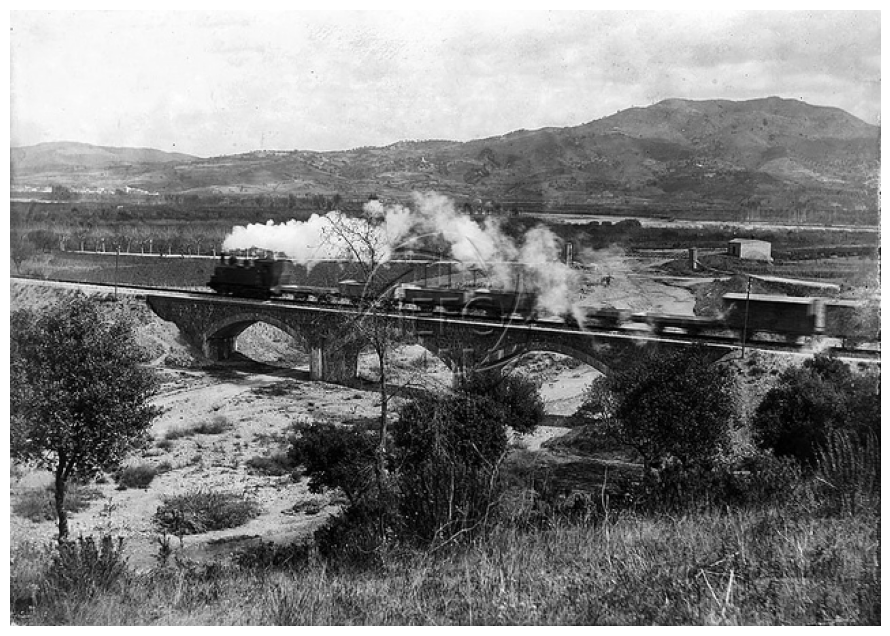

In [22]:
show_example()

captions: ['a number of giraffes near one another ', 'Three giraffes standing in the dirt in a fenced in area.', 'a couple of giraffes eat some food out of a trey ', 'Three giraffes stuck behind the confines of a zoo fence. ', 'Two giraffes eating together out of a trough in a fenced area.']


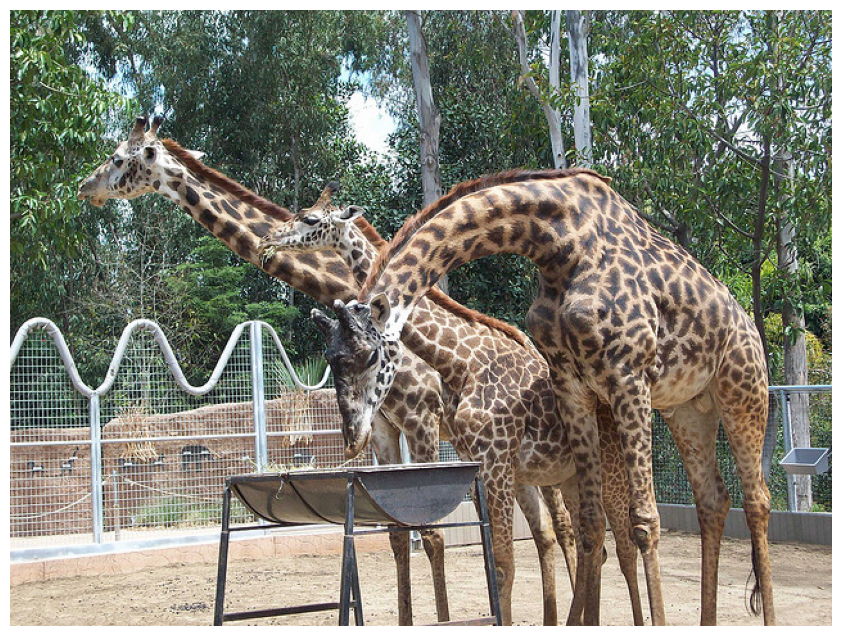

In [23]:
show_example()

captions: ['a cat is laying in some cloths on a bed', 'A cat laying inside of a bag sitting on top of a bed.', 'A cat hiding in a black blanket on a bed.', 'A cat peering from under some clothes or blankets on a bed.']


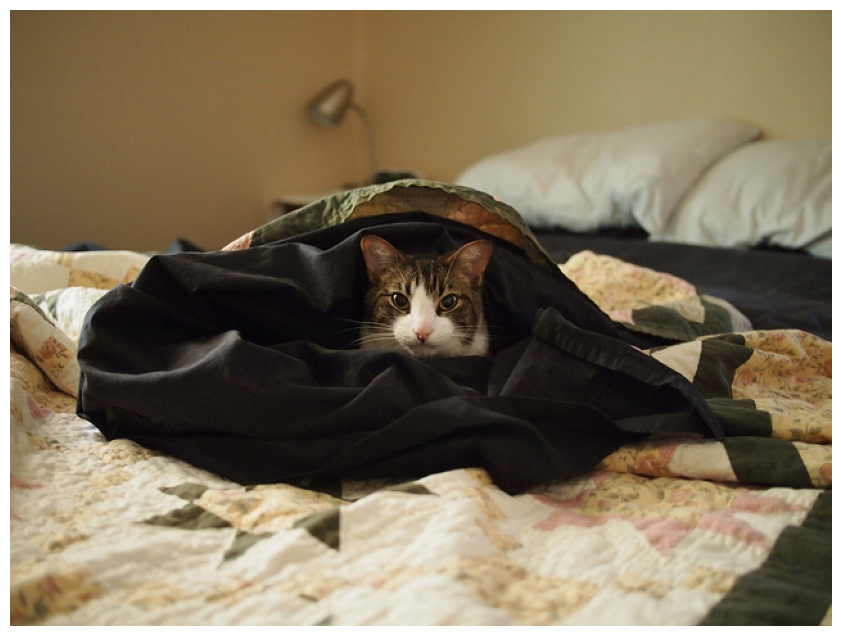

In [25]:
show_example()

captions: ['Action shot of kid at top of skate ramp.', 'A skateboarder in a black shirt and white pants going up a ramp. ', 'A person with long hair doing skateboard tricks', 'A kid performing a trick on his skateboard.', 'A person on a skateboard at the top of a ramp.']


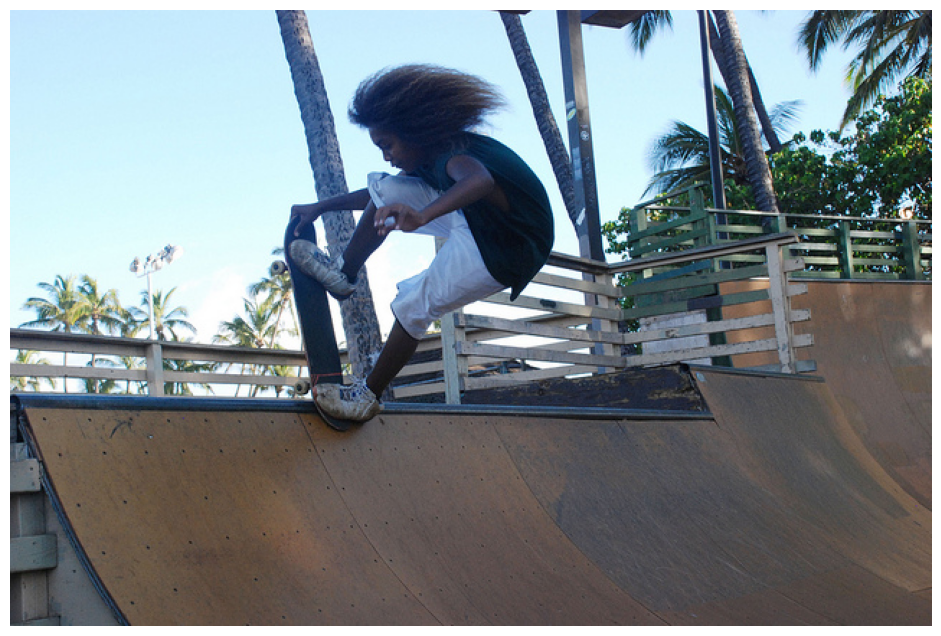

In [38]:
show_example()